In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt

In [2]:
# Enable altair's interactive visualization in jupyter notebook
alt.renderers.enable('notebook')
# Enable altair's local data server so notebook size doesn't get too large
alt.data_transformers.enable('data_server')

DataTransformerRegistry.enable('data_server')

In [3]:
df = pd.read_csv('data/master.csv')

In [4]:
summer_df = df[df['Season'] == 'Summer']
winter_df = df[df['Season'] == 'Winter']

In [5]:
plt.rcParams.update({'font.size': 16})

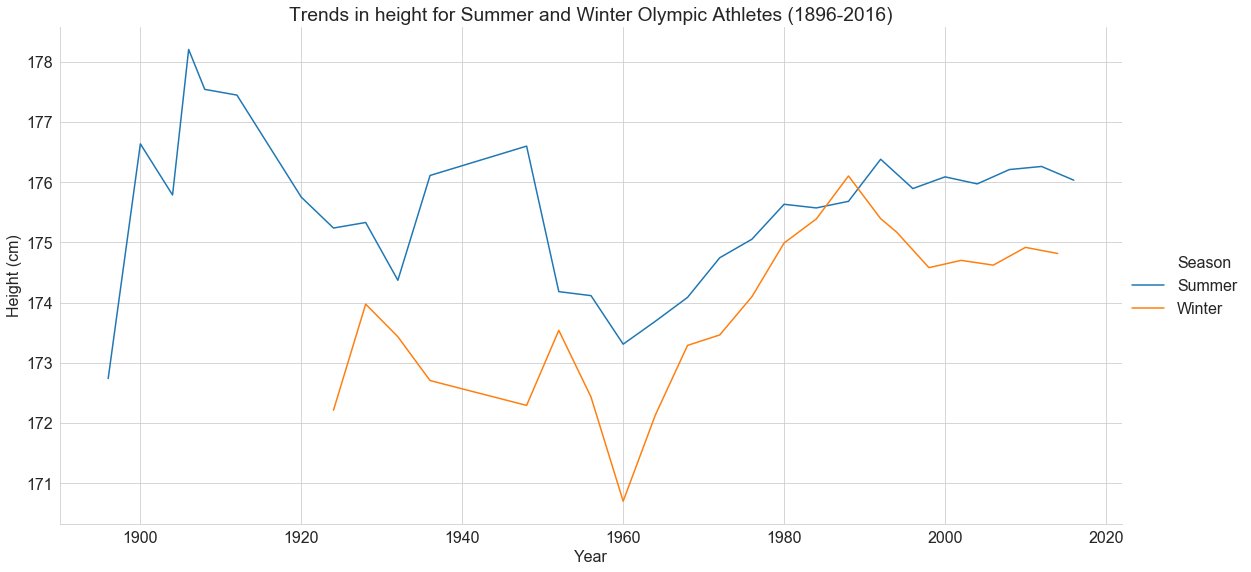

In [9]:
# Height distribution for Olympic Athletes: A seasonal perspective
# fig, ax = plt.subplots(figsize=(11.7, 8.27))

sns.set_style("whitegrid")
g = sns.relplot(x="Year", y="Height", kind="line", ci=None, hue='Season', data=df, height = 8, aspect = 2)

plt.title('Trends in height for Summer and Winter Olympic Athletes (1896-2016)', y=1.1)
plt.xlabel('Year')
plt.ylabel('Height (cm)')
plt.savefig('plots/height/height_season_line.png')
plt.show(g)
# plt.close(g.fig)

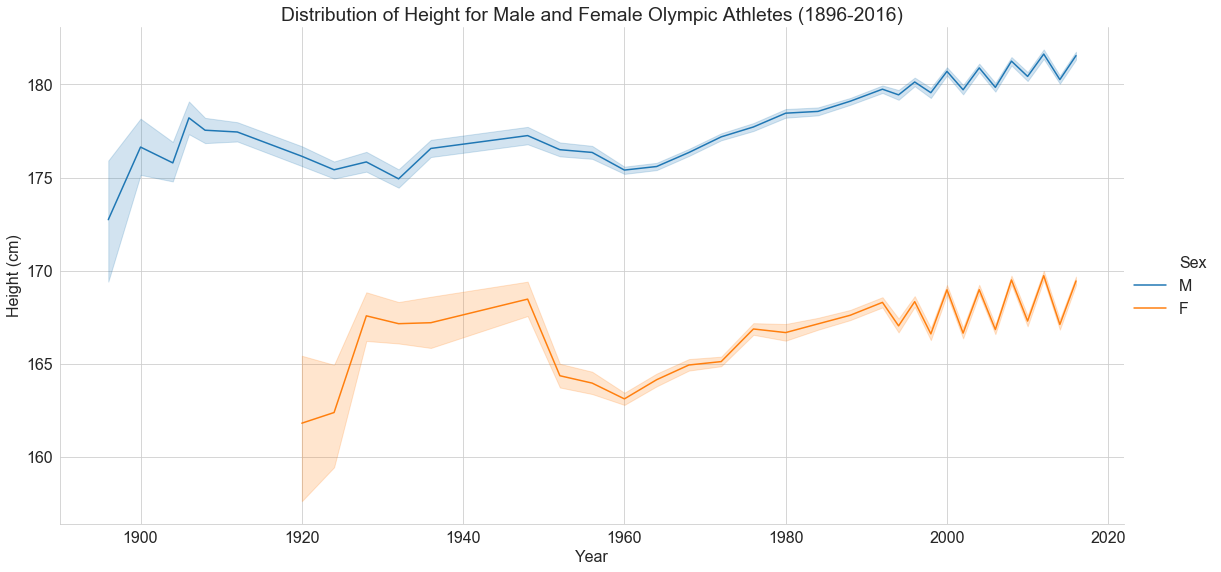

In [10]:
# Height distribution for Olympic Athletes: A gender perspective

sns.set_style("whitegrid")
g = sns.relplot(x="Year", y="Height", kind="line", hue='Sex', data=df, height = 8, aspect=2)
# g._legend.texts[0].set_text("Gender")
# g._legend.texts[1].set_text("Male")
# g._legend.texts[2].set_text("Female")

plt.title('Distribution of Height for Male and Female Olympic Athletes (1896-2016)', y=1.1)
plt.xlabel('Year')
plt.ylabel('Height (cm)')
plt.savefig('plots/height/height_gender_line.png')
plt.show(g)

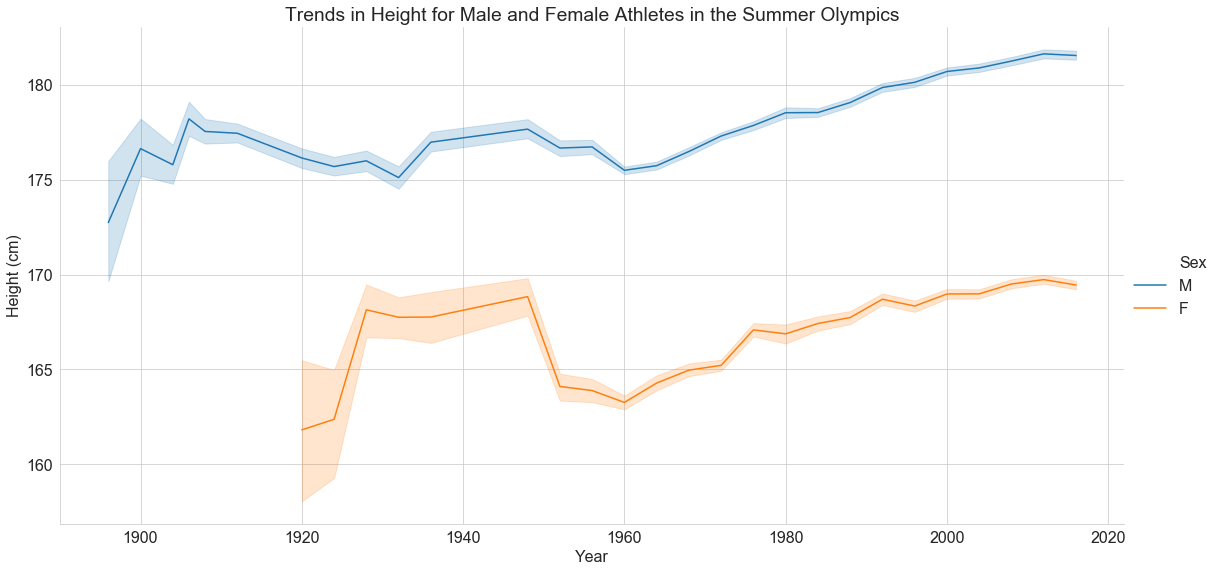

In [11]:
# Trends in Height for Summer Olympic Athletes: A gender perspective

sns.set_style("whitegrid")
g = sns.relplot(x='Year', y='Height', kind='line', hue='Sex', data=summer_df, height = 8, aspect=2)

plt.title('Trends in Height for Male and Female Athletes in the Summer Olympics', y=1.1)
plt.xlabel('Year')
plt.ylabel('Height (cm)')
plt.savefig('plots/height/height_summer_gender_line.png')
plt.show(g)

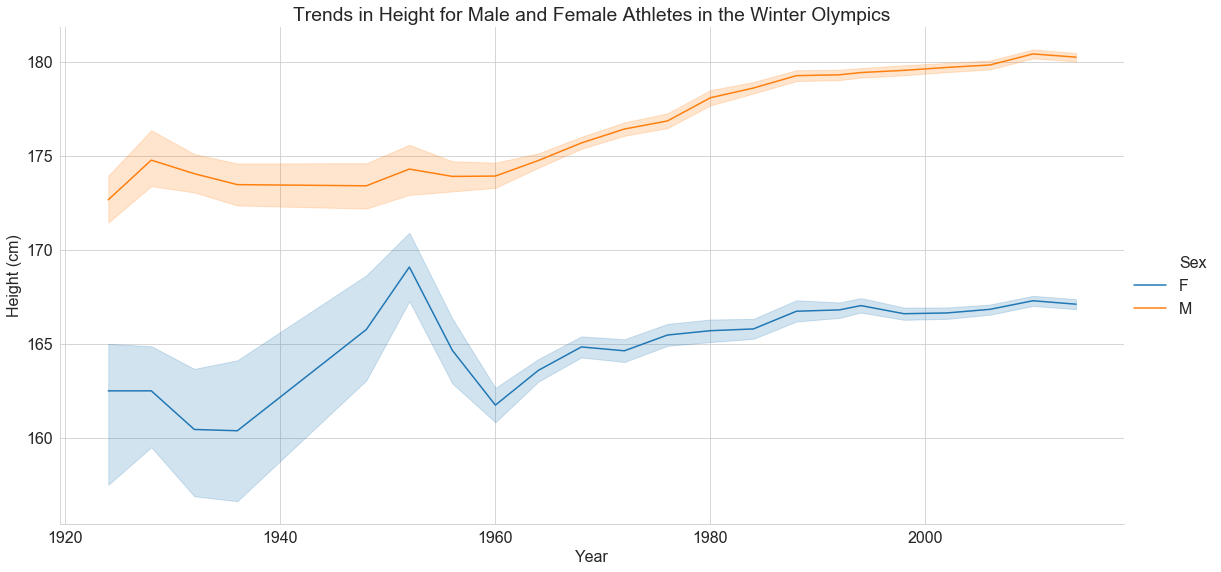

In [12]:
# Trends in Height for Winter Olympic Athletes: A gender perspective

sns.set_style("whitegrid")
g = sns.relplot(x='Year', y='Height', kind='line', hue='Sex', data=winter_df, height = 8, aspect=2)

plt.title('Trends in Height for Male and Female Athletes in the Winter Olympics', y=1.1)
plt.xlabel('Year')
plt.ylabel('Height (cm)')
plt.savefig('plots/height/height_winter_gender_line.png')
plt.show(g)

In [11]:
# Shoot yourself in the foot
alt.data_transformers.enable('default', max_rows=None)

DataTransformerRegistry.enable('default')

In [13]:
alt.themes.enable('opaque')

ThemeRegistry.enable('opaque')

In [ ]:
# Filtering the dataset so Altair charts are smaller in size.
height_df = df[['Year','Height','Sex','Season']]

In [22]:
# Distribution of Height for all Olympic Athletes (1896-2016)
chart = alt.Chart(height_df).mark_bar().encode(
    alt.X('Height:Q', bin=alt.Bin(maxbins=60), title='Height (cm)'),
    alt.Y('count():Q'),
    alt.Color('count(Height):Q', scale=alt.Scale(scheme='plasma'))
)

In [23]:
chart = chart.properties(title='Distribution of Height for all Olympic Athletes (1896-2016)')
chart = chart.configure(title = alt.VgTitleConfig(fontSize=12, offset=10))
chart = chart.configure_legend(titleFontSize=8)
chart = chart.configure_axis(titleFontSize=10)

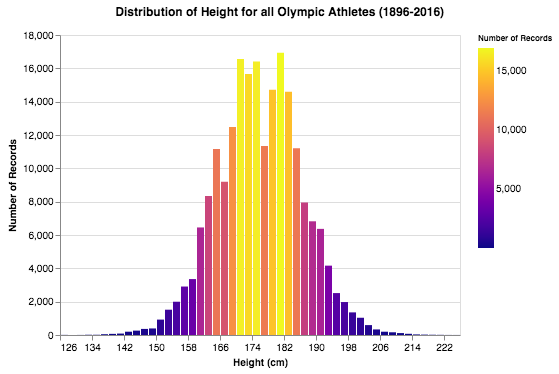

In [24]:
chart

In [25]:
chart.save('plots/height/height_histogram.png', scale_factor=7.0)

In [ ]:
chart = alt.Chart(height_df).mark_area(opacity=0.5, interpolate='step').encode(
    alt.X('Height:Q', bin=alt.Bin(maxbins=60), title='Height (cm)'),
    alt.Y('count():Q', stack=None, scale=alt.Scale(domain=[0, 16000])),
    alt.Color('Sex:N')
)

In [34]:
chart = chart.properties(title='Distribution of Height for Male and Female Olympic Athletes (1896-2016)')
chart = chart.configure(title = alt.VgTitleConfig(fontSize=12, offset=10))
chart = chart.configure_legend(titleFontSize=8)
chart = chart.configure_axis(titleFontSize=10)

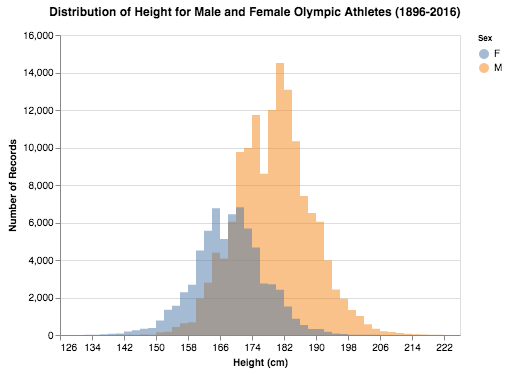

In [35]:
chart

In [36]:
chart.save('plots/height/height_gender_area.png', scale_factor=7.0)

In [40]:
chart = alt.Chart(height_df).mark_area(opacity=0.5, interpolate='step').encode(
    alt.X('Height:Q', bin=alt.Bin(maxbins=60), title='Height (cm)'),
    alt.Y('count():Q', stack=None, scale=alt.Scale(domain=[0, 14000])),
    alt.Color('Season:N')
)

In [41]:
chart = chart.properties(title='Distribution of Height for Summer and Winter Olympic Athletes (1896-2016)')
chart = chart.configure(title = alt.VgTitleConfig(fontSize=12, offset=10))
chart = chart.configure_legend(titleFontSize=8)
chart = chart.configure_axis(titleFontSize=10)

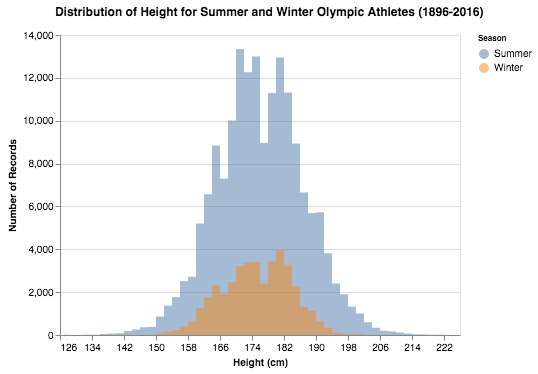

In [42]:
chart

In [43]:
chart.save('plots/height/height_season_area.png', scale_factor=7.0)

In [45]:
summer_height_df = summer_df[['Year','Height','Sex','Season']]
winter_height_df = winter_df[['Year','Height','Sex','Season']]

In [46]:
chart = alt.Chart(summer_height_df).mark_area(opacity=0.5, interpolate='step').encode(
    alt.X('Height:Q', bin=alt.Bin(maxbins=60), title='Height (cm)'),
    alt.Y('count():Q', stack=None, scale=alt.Scale(domain=[0, 11000])),
    alt.Color('Sex:N')
)

In [47]:
chart = chart.properties(title='Height Distribution for Male and Female Athletes in the Summer Olympics (1896-2016)')
chart = chart.configure(title = alt.VgTitleConfig(fontSize=12, offset=10))
chart = chart.configure_legend(titleFontSize=8)
chart = chart.configure_axis(titleFontSize=10)

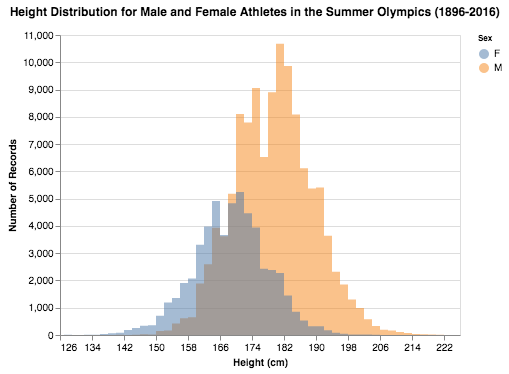

In [48]:
chart

In [49]:
chart.save('plots/height/height_summer_gender_area.png', scale_factor=7.0)

In [53]:
chart = alt.Chart(winter_df).mark_area(opacity=0.5, interpolate='step').encode(
    alt.X('Height:Q', bin=alt.Bin(maxbins=60), title='Height (cm)'),
    alt.Y('count():Q', stack=None, scale=alt.Scale(domain=[0, 4000])),
    alt.Color('Sex:N')
)

In [54]:
chart = chart.properties(title='Height Distribution for Male and Female Athletes in the Winter Olympics (1896-2016)')
chart = chart.configure(title = alt.VgTitleConfig(fontSize=12, offset=10))
chart = chart.configure_legend(titleFontSize=8)
chart = chart.configure_axis(titleFontSize=10)

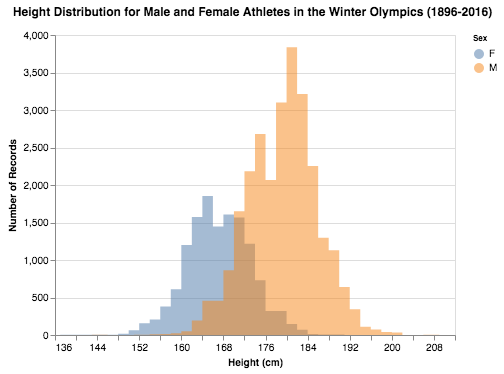

In [55]:
chart

In [56]:
chart.save('plots/height/height_winter_gender_area.png', scale_factor=7.0)